In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("archive/US_Recession.csv")
df.head()

,Unnamed: 0,Price_x,INDPRO,CPI,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,GDP,Rate,BBK_Index,Housing_Index,Recession
0,0,0.007111,0.046856,0.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.995788,0.981235,0.0,0.957474,0.00000,0.996359,0.463980,0.008161,0
1,1,0.009875,0.051140,0.001183,0.996264,0.0,0.991458,0.984958,0.987719,0.986550,0.998219,0.993983,0.976998,0.0,0.953608,0.00000,0.986650,0.449089,0.009267,0
2,2,0.012196,0.055858,0.005914,0.993773,0.0,0.976205,0.967509,0.962573,0.963743,0.969121,0.968712,0.950363,0.0,0.926546,0.00000,1.000000,0.422505,0.010159,0
3,3,0.012114,0.053475,0.009463,0.976339,0.0,0.960342,0.943442,0.938012,0.946199,0.956057,0.961492,0.951574,0.0,0.934278,0.00273,0.983010,0.397466,0.010395,0
4,4,0.005410,0.058643,0.015968,0.957659,0.0,0.939597,0.927798,0.930994,0.943860,0.971496,0.985560,0.987893,0.0,0.985825,0.00273,0.980583,0.373584,0.010048,1


In [3]:
df.columns

Index(['Unnamed: 0', 'Price_x', 'INDPRO', 'CPI', '3 Mo', '4 Mo', '6 Mo',
       '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr',
       'GDP', 'Rate', 'BBK_Index', 'Housing_Index', 'Recession'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(inplace=True)


In [5]:
# Separate predictors and target variable
X = df.drop(columns=['Recession'])  # Predictors
y = df['Recession']  # Target variable

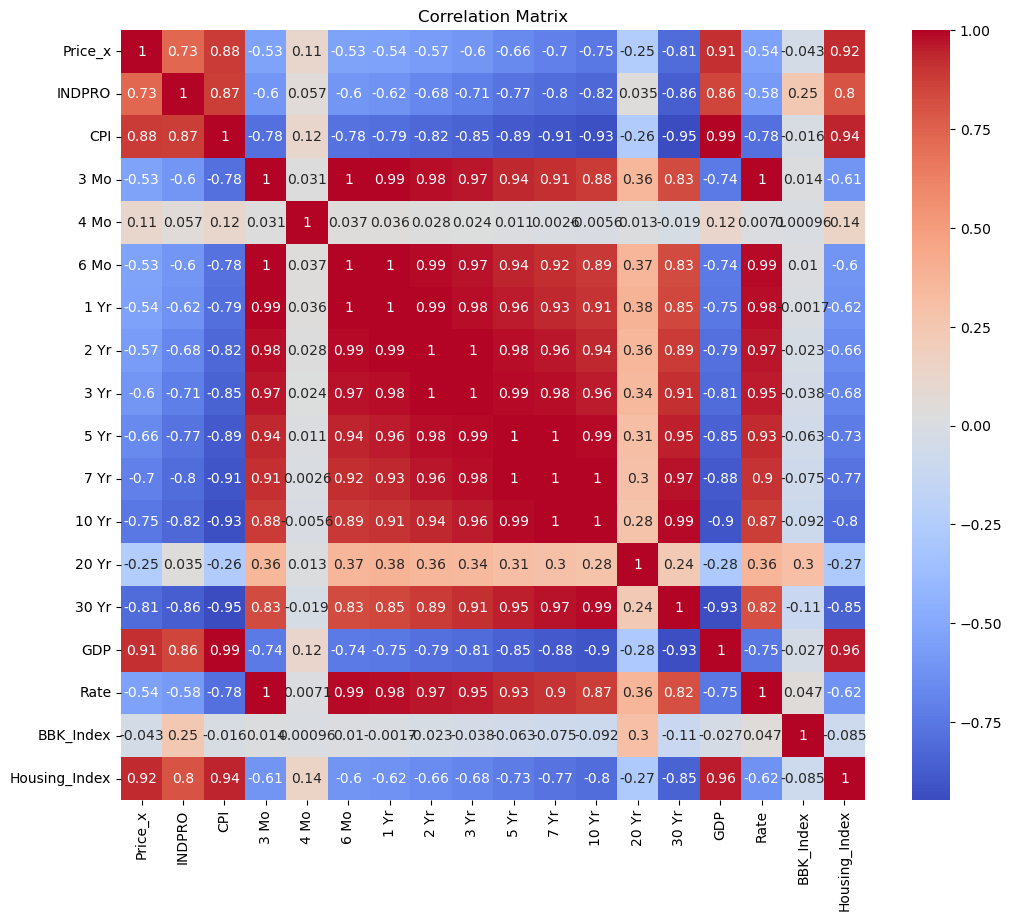

In [6]:
# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform RFE (Recursive Feature Elimination) to select top features
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)  # Selecting top 10 features, adjust as needed
rfe = rfe.fit(X_scaled, y)

# List the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:\n", selected_features)

Selected Features:
 Index(['Price_x', 'INDPRO', '6 Mo', '1 Yr', '2 Yr', '10 Yr', '30 Yr', 'Rate',
       'BBK_Index', 'Housing_Index'],
      dtype='object')


In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, rfe.support_], y, test_size=0.3, random_state=42)

In [9]:
# Step 4: Model Training
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [10]:
# Step 5: Model Evaluation
y_pred = logistic_model.predict(X_test)


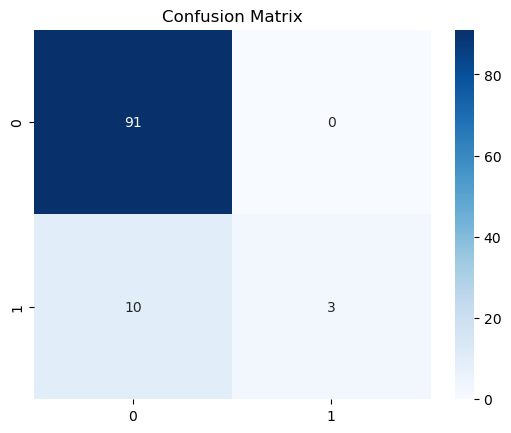

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9038461538461539
Precision: 1.0
Recall: 0.23076923076923078
F1-Score: 0.375


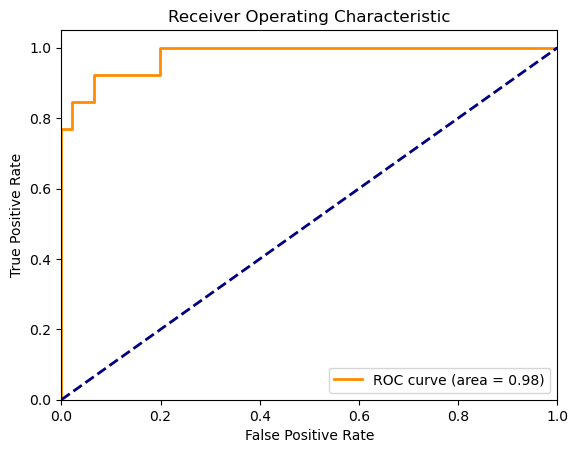

In [13]:
# ROC Curve and AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Step 6: Hyperparameter Tuning (Optional)
# Example of grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

grid_model = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_model.fit(X_train, y_train)

print(f"Best parameters: {grid_model.best_params_}")
print(f"Best cross-validation score: {grid_model.best_score_}")


c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarni

Best parameters: {'C': 4.281332398719396, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9375


c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\arriv\anaconda3\envs\dev\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
# Use the best model to predict
best_model = grid_model.best_estimator_
y_pred_best = best_model.predict(X_test)

# Re-evaluate the model with best parameters
cm_best = confusion_matrix(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Accuracy (Best Model): {accuracy_best}")
print(f"Precision (Best Model): {precision_best}")
print(f"Recall (Best Model): {recall_best}")
print(f"F1-Score (Best Model): {f1_best}")

Accuracy (Best Model): 0.9326923076923077
Precision (Best Model): 1.0
Recall (Best Model): 0.46153846153846156
F1-Score (Best Model): 0.631578947368421


In [16]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred_best, target_names=['0', '1'])
print(report)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        91
           1       1.00      0.46      0.63        13

    accuracy                           0.93       104
   macro avg       0.96      0.73      0.80       104
weighted avg       0.94      0.93      0.92       104

